# Assignment 2: K-means clustering

In this assignment, we are given a dataset called `credit-card-holder-data.csv` to work on. We will use its attributes to perform a customer segmentation using K-means clustering model.

This is the overall approach:

1. Load the data
2. Process the data
3. Analyze the data
4. Train the K-means clustering model
5. Visualize the clusters in 2D and 3D using different dimension reduction techniques
6. Analyze the characteristic of each cluster


## Step 1: Data Loading

First and foremost, we must import necessary libraries for the training, which are Pandas, Numpy, Matplotlib, Seaborn, and Yellowbrick. 

In [ ]:
# Load Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load necessary functions from the Scikit-learn library
from sklearn.preprocessing import StandardScaler    # features standardization
from sklearn.cluster import KMeans, MiniBatchKMeans # Kmeans algorithm
from sklearn.decomposition import PCA               # dimension reduction
from sklearn.manifold import TSNE                   # dimension reduction

# Load necessary functions from the Yellowbrick library
from yellowbrick.cluster import KElbowVisualizer    # Elbow method

Then, we will load the given `credit-card-holder-data.csv` dataset to this worksheet and read the loaded one using pandas. The dataset summarizes the usage behavior of active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.The dataset summarizes the usage behavior of active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables. To confirm that the data loading is successful, we will print out the dataset as following.

In [ ]:
# Load and display the first 5 data
df = pd.read_csv("credit-card-holder-data.csv")
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# Get some basic data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Some useful attributes in the dataset are:

- *BALANCE*: Balance amount left in their account to make purchases.
- *BALANCE_FREQUENCY*: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).
- *PURCHASES*: Amount of purchases made from account.
- *ONEOFF_PURCHASES*: Maximum purchase amount done in one-go (i.e., one-time payment for a purchase).
- *INSTALLMENTS_PURCHASES*: Amount of purchase done in installment (i.e., multiple payments for a purchase). Observation: PURCHASES = ONEOFF_PURCHASE + INSTALLMENT_PURCHASES).
- *CASH_ADVANCE*: Cash in advance given by the user (a cash advance is when taking money out of the ATM using credit card instead of debit card or ATM card).
- *PURCHASES_FREQUENCY*: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
- *ONEOFF_PURCHASES_FREQUENCY*: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).
- *PURCHASES_INSTALLMENTS_FREQUENCY*: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).
- *CASH_ADVANCE_FREQUENCY*: How frequently the cash in advance being paid.
- *CASH_ADVANCE_TRX*: Number of Transactions made with "Cash in Advanced".
- *PURCHASES_TRX*: Number of purchase transactions made.
- *CREDIT_LIMIT*: Limit of Credit Card for user.
- *PAYMENTS*: Amount of payment done by user (i.e., payment for the use of credit card)
- *MINIMUM_PAYMENTS*: Minimum amount of payments made by user.
- *PRC_FULL_PAYMENT*: Percent of full payment paid by user.
- *TENURE*: Tenure of credit card service for user (i.e., how long (in months) you should have held the credit card before they will grant you credit).

Although we knew that there is no categorical data features in this dataset, we still want to make sure that our assumption is correct by printing out the list of categorical features.

In [ ]:
# Get the list of categorical features (i.e., having string column names) 
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
cat_cols

[]

Since the above list is empty, we are convinced that there is no categorical attributes in this dataset. Therefore, no further categorical encoding is needed.

## Step 2: Data Cleaning
Before processing the data, we will make a copy of the data to preserve the orginial one in case we did something inappropriately.

In [ ]:
# Make a data copy
data = df.copy()

There are columns such as `Unnamed: 0` not useful for our model building, so we will drop them. We will print the data to confirm that the removal is successful.

In [ ]:
# Drop "Unnamed: 0" column as it does not contain useful information for
# building the model
data = data.drop(columns = ["Unnamed: 0"], axis = 1)

# Show the dataframe
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Next, we will plot the correlation heatmap to remove attributes that are highly correlated with one another. This action is done to reduce the effect of correlated attributes to our data. Moreover, we also want to exclude redudant attributes from the dataset to reduce the dimension, which then directly increase the running time.

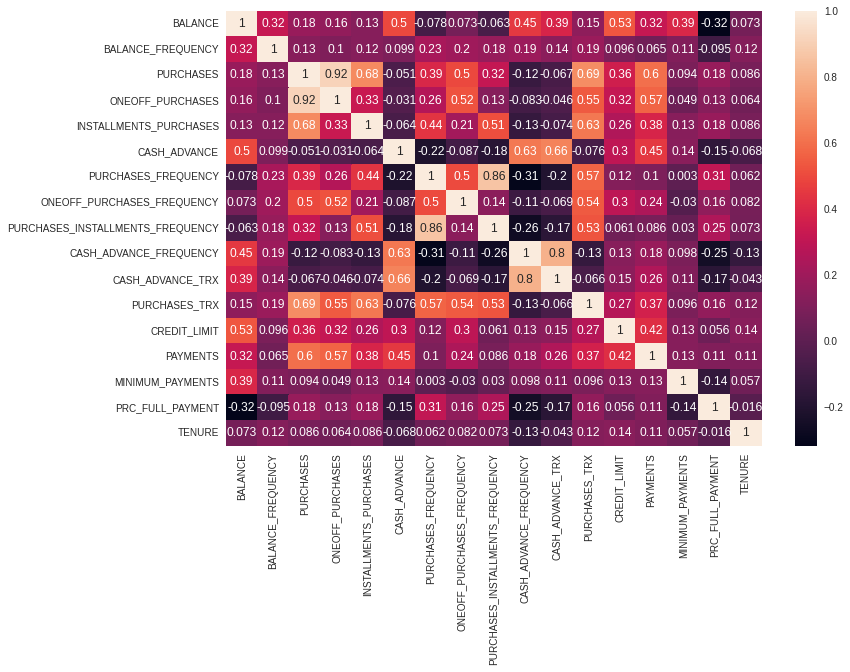

In [ ]:
# Plot the correlation heatmap between pairs of features
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), annot = True)


For this data, a threshold of (+-)0.65 is chosen. If there is any two atributes having the score greater than 0.65 or lower than -0.65, one of the two attributes will be removed from the dataset. The removal attribute will be chosen subjectively based on self-reasonings. As a result, there are 6 positively correlated pairs of attributes, which are:
- *PURCHASES* and *ONEOFF_PURCHASES*
- *PURCHASES* and *INSTALLMENTS_PURCHASES*
- *PURCHASES* and *PURCHASES_TRX*
- *PURCHASES_INSTALLMENTS_FREQUENCY* and *PURCHASES_FREQUENCY* 
- *CASH_ADVANCE_TRX* and *CASH_ADVANCE*
- *CASH_ADVANCE_TRX* and *CASH_ADVANCE_FREQUENCY*

Since *PURCHASE* attibutes are correlated with 3 other attributes, we will remove those attributes (*ONEOFF_PURCHASES*,*INSTALLMENTS_PURCHASES*, and *PURCHASES_TRX*). This is done because there is we are making dimension reduction and we want to have the smallest number of useful attributes. Moreover, there is also a chance that those attributes are inter-correlated with each other through *PURCHASE*, so we want to delete them to prevent this hypothesis from being true.

Using the same reason, we will remove *CASH_ADVANCE* and *CASH_ADVANCE_FREQUENCY*.

And for the *PURCHASES_INSTALLMENTS_FREQUENCY* and *PURCHASES_FREQUENCY* pair, we will remove the former because it seems to be a sub-type of the latter.



In [ ]:
# Drop highly correlated data features
data = data.drop(columns = ["ONEOFF_PURCHASES",
                            "INSTALLMENTS_PURCHASES",
                            "PURCHASES_TRX",
                            "PURCHASES_INSTALLMENTS_FREQUENCY",
                            "CASH_ADVANCE",
                            "CASH_ADVANCE_FREQUENCY"], axis = 1)

After the processing, our dataset now contains only 11 data features.

## Step 3: Data Analysis

After processing the data, we will use Elbow method to determine the number of clusters K. First, we have to prepare the normalized data using StandardScaler. The StandardScaler's job is to standardize the given data by removing the mean and scaling them to the unit variance.

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.values)  # Fit and transform the data

Then, we will find the location of the “elbow” (the optimal number of clusters) using the “knee point detection algorithm”. To do that, we will set `locate_elbow` to `True`. Moreover, we can ignore the training time per K by setting `timings` to `False` because this assignment neither limit the training time or ask for time optimization,.

Furthermore, since the dataset contains 8950 data entries, the maximum number of clusters (k) is 8950. However, for the user segmentation, we are interested with a small number of clusters, saying from 1 to 10. Therefore, we will set `k = (1,11)` to find an optimal value of k that is between 1 and 10.

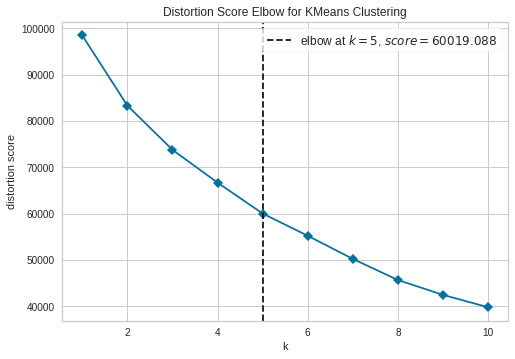

In [ ]:
# Identify a good number of clusters between 1 and 10

elbow_method = KElbowVisualizer(KMeans(), k = (1,11),
                                timings = False, locate_elbow = True)
elbow_method.fit(scaled_data)
elbow_method.show()

The above function returns 4 as the optimal number of clusters. To convince ourselves that this is a truely optimal number of cluster to train the model, we will plot another graph representing the Calinski-Harabasz Index. This index is calculated by dividing the variance of the sums of squares of the distances of individual objects to their cluster center by the sum of squares of the distance between the cluster centers. Higher the Calinski-Harabasz Index value, better the clustering model.

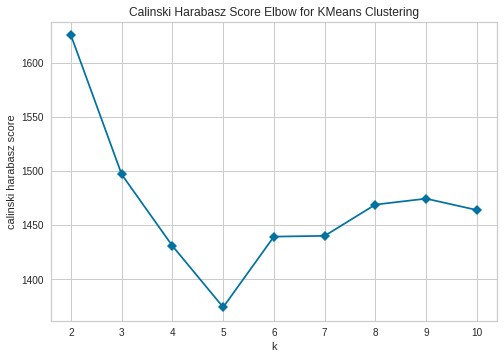

In [ ]:
# Use calinski harabasz score to identify the best k
calinski_harabasz = KElbowVisualizer(KMeans(), k = (2,11),
                                     metric = 'calinski_harabasz',
                                     timings = False,
                                     locate_elbow = False)
calinski_harabasz.fit(scaled_data)
calinski_harabasz.show()  

We can see that our data is not optimal according to the Calinski-Harabasz Index graph as the graph has multiple peaks and the largest peak is at `k = 2`. Therefore, we will use the result of the Elbow method instead.

## Step 4: Model Training
We will train the K-means clustering model so that it splits our data into 4 clusters.

In [ ]:
# Let us pick 4 clusters
kmeans_model = KMeans(n_clusters = 4)

# Run K-means algorithm with K = 4
kmeans_model.fit(scaled_data)

KMeans(n_clusters=4)

We will print out the cluster's labels of the data entries to convince that the splitting is successfully done.

In [ ]:
# Show cluster label of training data samples
kmeans_model.labels_

array([3, 3, 1, ..., 0, 0, 0], dtype=int32)

To convince ourselves that `k = 4` is a truely optimal number of cluster to train the model, we will plot another graph representing the calinski harabasz score.

After the segmentation, we also know the cluster centroids' locations.

In [ ]:
# Show location of cluster centroids 
kmeans_model.cluster_centers_

array([[-0.59538046, -1.53615352, -0.30550239, -0.39838907, -0.42981602,
        -0.24723933, -0.32020717, -0.27496724, -0.25024906,  0.25595282,
        -0.90425033],
       [-0.03107543,  0.41232872,  1.13082229,  1.08450641,  1.76914761,
        -0.30775553,  0.68586605,  0.54185843, -0.11585454,  0.60361083,
         0.26017636],
       [ 1.98312047,  0.42630951, -0.01575582, -0.3309472 , -0.17225035,
         1.43743318,  1.21264767,  0.8372518 ,  0.99635583, -0.44119547,
         0.1328798 ],
       [-0.19308174,  0.40106544, -0.23968567, -0.11513952, -0.36143036,
        -0.12271829, -0.36606438, -0.25286294, -0.08441286, -0.20251196,
         0.25706909]])

## Step 5: Cluster Visualization

After training the model and having the locations of cluster centroids and individual entries, we will visualize the clusters in 2D and 3D using two different techniques:
- Dimensionality reduction using Principal component analysis (PCA)
- and T-SNE. 

### a. 3D visualization with PCA
In this section, we will project data features into a three-dimensional space and visualize the clusters. But first, we are interested in knowing how much data variance that the reduced dimensional space carries.

In [ ]:
# Find all principal components of the data
pca = PCA(n_components = len(data.columns))
pca.fit(scaled_data)

# Print the amount of variance carried in each principal components
print("Amount of variance carried in each principal components:\n" +
      str(pca.explained_variance_))

# Print the ratio of ammount of variance carried in each principal components
print("\nRatio of variance carried in each principal components:\n" +
      str(pca.explained_variance_ratio_))

# Sum of all ratios must be 1
print("\nCummulative sum of all ratios:\n" +
      str(pca.explained_variance_ratio_.cumsum()))

Amount of variance carried in each principal components:
[2.80924156 2.07314903 1.17965473 0.98571199 0.90967    0.78066643
 0.71035111 0.58941943 0.4256332  0.27795932 0.25977239]

Ratio of variance carried in each principal components:
[0.25535706 0.18844704 0.10722936 0.08960017 0.08268803 0.07096175
 0.06457016 0.0535776  0.0386896  0.02526621 0.02361303]

Cummulative sum of all ratios:
[0.25535706 0.4438041  0.55103345 0.64063362 0.72332166 0.7942834
 0.85885356 0.91243116 0.95112076 0.97638697 1.        ]


The first three principal components cover 55.1% of the data variance, which is a moderate number. Therefore, it is reasonable to perform the PCA on 3 components and make a 3D scatterplot out of the projected data points.

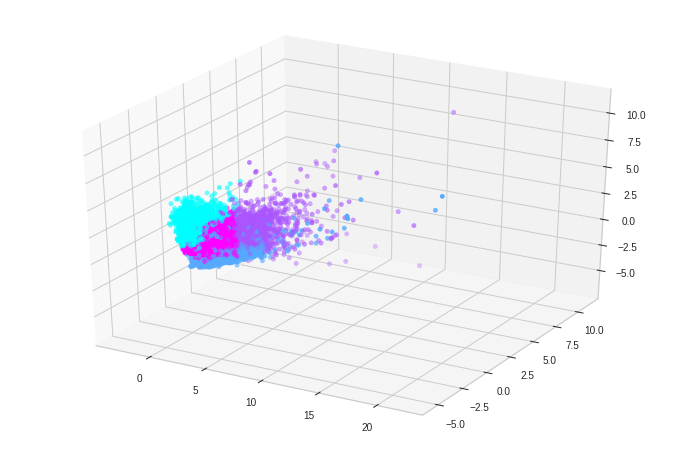

In [ ]:
pca3 = PCA(n_components = 3)

# Construct the 3-dimensional PCA space and project the original data points on
pca3_data = pca3.fit_transform(scaled_data)

# Create a dataframe from the projected data points in 3-dimensional PCA space
pca3_df = pd.DataFrame(pca3_data,
                       columns = ["feature-1", "feature-2", "feature-3"])

# Plot the data points in the 3-dimensional space
plt.figure(figsize = (12, 8))
ax = plt.subplot(projection = "3d")
ax.scatter(pca3_df["feature-1"], pca3_df["feature-2"], pca3_df["feature-3"],
           c = kmeans_model.labels_, cmap = "cool")
plt.show()

### b. 3D visualization with T-SNE

In this section, we will use a different dimensionality reduction technique to visualize the data called T-distributed Stochastic Neighbor Embedding (T-SNE). We want to see the different between the results of two techniques.

Although it is recommended to perform another dimensionality reduction technique before applying the T-SNE, our dataset has a relatively small number of attributes (11 only). Therefore, we will not have to apply PCA before running T-SNE.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.016s...
[t-SNE] Computed neighbors for 8950 samples in 1.346s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.316235
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.462967
[t-SNE] KL divergence after 1000 iterations: 1.236012


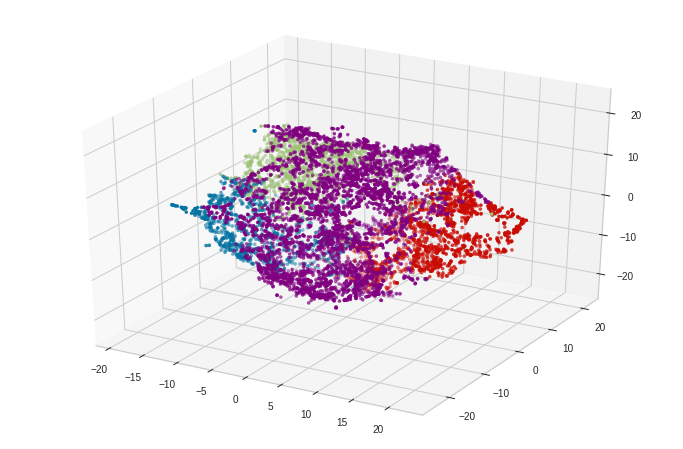

In [ ]:
# Initialize TSNE with the TSNE 3-D space dimension
tsne3 = TSNE(n_components = 3, verbose = 1, random_state = 123) 

# Project data to the TSNE space
tsne3_data = tsne3.fit_transform(scaled_data) 

# Create a dataframe with TSNE features and data label
tsne3_df = pd.DataFrame()
tsne3_df["label"] = kmeans_model.labels_
tsne3_df["feature-1"] = tsne3_data[:,0]
tsne3_df["feature-2"] = tsne3_data[:,1]
tsne3_df["feature-3"] = tsne3_data[:,2]

# Visualize the clusters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection = '3d')

ax.scatter(tsne3_df["feature-1"][tsne3_df["label"] == 0],
           tsne3_df["feature-2"][tsne3_df["label"] == 0],
           tsne3_df["feature-3"][tsne3_df["label"] == 0], c = 'r', s = 10)
ax.scatter(tsne3_df["feature-1"][tsne3_df["label"] == 1],
           tsne3_df["feature-2"][tsne3_df["label"] == 1],
           tsne3_df["feature-3"][tsne3_df["label"] == 1], c = 'g', s = 10)
ax.scatter(tsne3_df["feature-1"][tsne3_df["label"] == 2],
           tsne3_df["feature-2"][tsne3_df["label"] == 2],
           tsne3_df["feature-3"][tsne3_df["label"] == 2], c = 'b', s = 10)
ax.scatter(tsne3_df["feature-1"][tsne3_df["label"] == 3],
           tsne3_df["feature-2"][tsne3_df["label"] == 3],
           tsne3_df["feature-3"][tsne3_df["label"] == 3], c = 'purple', s = 10)

We can see that the two graphs are quite similar. The largest difference is that there is no large outliner in the latter graph, meaning that T-SNE optimizes the clusters more.

### c. 2D visualization with PCA

According to the above *cummulative sum of all ratios*, the first two principal components cover 44.3% of the data variance, which is also a moderate number. Therefore, it is reasonable to perform the PCA on 2 components and make a 2D scatterplot out of the projected data points.

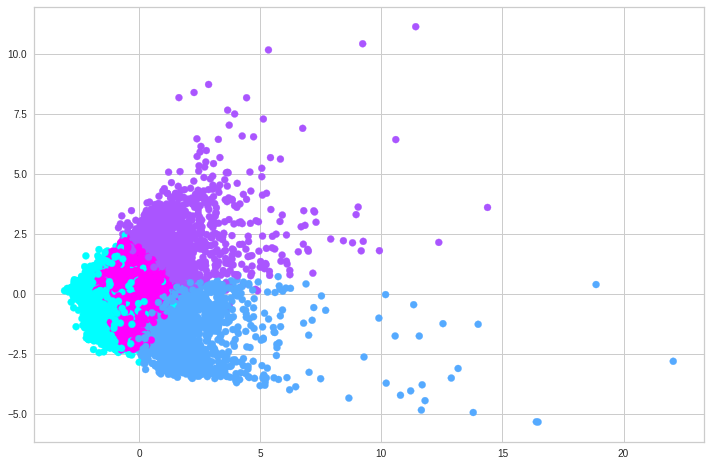

In [ ]:
pca2 = PCA(n_components = 2)

# Construct the 2-dimensional PCA space and project the original data points on
pca2_data = pca2.fit_transform(scaled_data)

# Create a dataframe from the projected data points in 2-dimensional PCA space
pca2_df = pd.DataFrame(pca2_data, columns = ["feature-1", "feature-2"])

# Plot the data points in the 2-dimensional space
plt.figure(figsize = (12, 8))
ax = plt.subplot()
ax.scatter(pca2_df["feature-1"], pca2_df["feature-2"],
           c = kmeans_model.labels_, cmap = "cool")
plt.show()

### d. 2D visualization with T-SNE

We will one time time visualize the data with T-SNE in 2D space to compare with the PCA's.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.021s...
[t-SNE] Computed neighbors for 8950 samples in 1.324s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.316235
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.004097
[t-SNE] KL divergence after 1000 iterations: 1.398129


[Text(0.5, 1.0, 'Cluster visualization on a 2-dimensional space')]

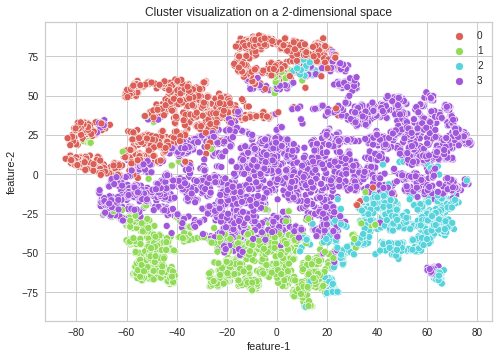

In [ ]:
# Initialize TSNE with the TSNE 2-D space dimension
tsne2 = TSNE(n_components = 2, verbose = 1, random_state = 123)

# Project data to the TSNE space
tsne2_data = tsne2.fit_transform(scaled_data)

# Create a dataframe with TSNE features and data label
tsne2_df = pd.DataFrame()
tsne2_df["label"] = kmeans_model.labels_
tsne2_df["feature-1"] = tsne2_data[:,0]
tsne2_df["feature-2"] = tsne2_data[:,1]

# Visualize the clusters
sns.scatterplot(x = "feature-1", y = "feature-2", # Set the two TSNE features to the axes
                hue = tsne2_df.label.tolist(), # Set the label
                palette = sns.color_palette("hls", 4), # Set cluster colors 
                data = tsne2_df).set(title="Cluster visualization on a 2-dimensional space") # Set dataframe to visulize and plot title

We can see that the two graphs are different, yet it is quite the same as their 3D's version. We also have the same conclusion in which T-SNE optimizes the clusters more.

## Step 6: Cluster Analysis

After visualizing the clusters, we are interested in seeing the clusters' characteristics. First, we will access the cluster information from the loaded model.

In [ ]:
# Access cluster information from the loaded model
cluster = kmeans_model.labels_
cluster_0 = np.where(cluster == 0)   # indices of data samples in cluster 0
cluster_1 = np.where(cluster == 1)   # indices of data samples in cluster 1
cluster_2 = np.where(cluster == 2)   # indices of data samples in cluster 2
cluster_3 = np.where(cluster == 3)   # indices of data samples in cluster 3

Then, we will plot the histogram of all data features to select the features that can distinguish one cluster from another.

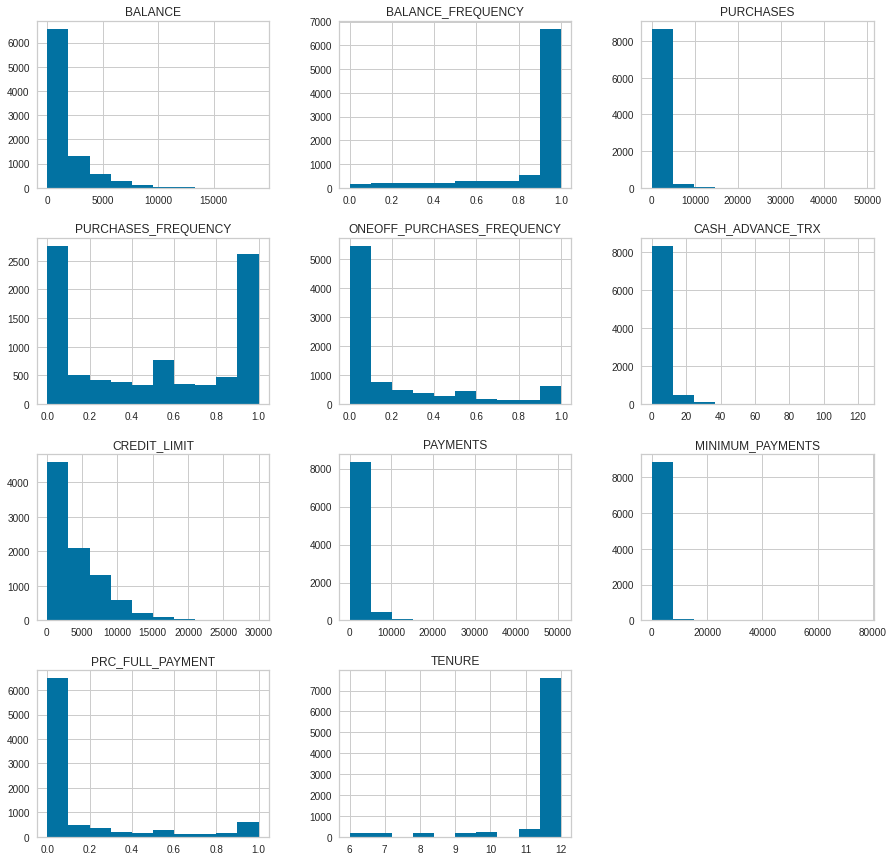

In [ ]:
# Plot histograms of all data features
data.hist(figsize = (15, 15))
plt.show()

Look the the above graphs, we will choose 5 attributes that are either binomial or multimodel to analyze the clusters' characteristics. We believe that choosing the features having large fluctuation can help distinguish the cluster more easily. The chosen features are *BALANCE*, *PURCHASE_FREQUENCY*, *ONOFF_PURCHASE_FREQUENCY*, *CREDIT_LIMIT*, and *PRC_FULL_PAYMENT*. 

After determining which attributes to look at, we will print out their average value of each clusters and some samples from each clusters. 

In [ ]:
# Get the average value of cluster 0
data.iloc[cluster_0].mean()

BALANCE                        325.240648
BALANCE_FREQUENCY                0.513370
PURCHASES                      350.494272
PURCHASES_FREQUENCY              0.330458
ONEOFF_PURCHASES_FREQUENCY       0.074235
CASH_ADVANCE_TRX                 1.561600
CREDIT_LIMIT                  3329.404743
PAYMENTS                       937.140643
MINIMUM_PAYMENTS               281.011663
PRC_FULL_PAYMENT                 0.228576
TENURE                          10.307200
dtype: float64

In [ ]:
# Get data samples in cluster 0
data.iloc[cluster_0].head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
9,152.225975,0.545455,1281.60,0.166667,0.166667,0,11000.0,1164.770591,100.302262,0.00,12
16,2072.074354,0.875000,0.00,0.000000,0.000000,3,3000.0,391.974562,376.579631,0.00,8
17,41.089489,0.454545,519.00,0.416667,0.000000,0,2500.0,254.590662,73.203221,0.25,12
46,474.447149,0.500000,109.74,0.375000,0.000000,1,1700.0,176.013005,147.199792,0.00,8
63,7.152356,0.090909,840.00,0.083333,0.083333,0,1600.0,0.000000,864.206542,0.00,12


In [ ]:
# Get the average value of cluster 1
data.iloc[cluster_1].mean()

BALANCE                       1502.068546
BALANCE_FREQUENCY                0.975081
PURCHASES                     3421.998255
PURCHASES_FREQUENCY              0.925690
ONEOFF_PURCHASES_FREQUENCY       0.731067
CASH_ADVANCE_TRX                 1.150943
CREDIT_LIMIT                  6992.922691
PAYMENTS                      3304.914669
MINIMUM_PAYMENTS               594.986815
PRC_FULL_PAYMENT                 0.330479
TENURE                          11.865903
dtype: float64

In [ ]:
# Get data samples in cluster 1
data.iloc[cluster_1].head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2,2495.148862,1.0,773.17,1.000000,1.000000,0,7500.0,622.066742,627.284787,0.0,12
6,627.260806,1.0,7091.01,1.000000,1.000000,0,13500.0,6354.314328,198.065894,1.0,12
21,6369.531318,1.0,6359.95,1.000000,0.916667,6,11250.0,2077.959051,1659.775075,0.0,12
33,125.660453,1.0,636.79,0.916667,0.916667,0,1200.0,423.449696,196.301885,0.3,12
37,4047.480828,1.0,2380.55,0.750000,0.500000,7,5000.0,1617.894416,1541.141605,0.0,12


In [ ]:
# Get the average value of cluster 2
data.iloc[cluster_2].mean()

BALANCE                       5692.172690
BALANCE_FREQUENCY                0.978260
PURCHASES                      969.542272
PURCHASES_FREQUENCY              0.357525
ONEOFF_PURCHASES_FREQUENCY       0.151072
CASH_ADVANCE_TRX                13.058252
CREDIT_LIMIT                  8906.557811
PAYMENTS                      4156.905789
MINIMUM_PAYMENTS              3186.171770
PRC_FULL_PAYMENT                 0.024673
TENURE                          11.695146
dtype: float64

In [ ]:
# Get data samples in cluster 2
data.iloc[cluster_2].head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
15,6886.213231,1.000000,1611.70,0.500000,0.000000,4,8000.0,1993.439277,2109.906490,0.0,12
19,3577.970933,1.000000,398.64,1.000000,0.000000,0,4000.0,1053.980464,12465.549380,0.0,12
23,3800.151377,0.818182,4248.35,1.000000,0.083333,13,9000.0,9479.043842,1425.426525,0.0,12
24,5368.571219,1.000000,0.00,0.000000,0.000000,4,6000.0,1422.726707,1657.002877,0.0,11
28,7152.864372,1.000000,387.05,0.666667,0.166667,16,10500.0,1601.448347,1648.851345,0.0,12


In [ ]:
# Get the average value of cluster 3
data.iloc[cluster_3].mean()

BALANCE                       1162.073208
BALANCE_FREQUENCY                0.972238
PURCHASES                      492.136056
PURCHASES_FREQUENCY              0.444432
ONEOFF_PURCHASES_FREQUENCY       0.094781
CASH_ADVANCE_TRX                 2.409779
CREDIT_LIMIT                  3164.094907
PAYMENTS                      1001.620793
MINIMUM_PAYMENTS               667.185777
PRC_FULL_PAYMENT                 0.094567
TENURE                          11.861215
dtype: float64

In [ ]:
# Get data samples in cluster 3
data.iloc[cluster_3].head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.166667,0.000000,0,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.000000,0.000000,4,7000.0,4103.032597,1072.340217,0.222222,12
3,1666.670542,0.636364,1499.00,0.083333,0.083333,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,0.083333,0.083333,0,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.666667,0.000000,0,1800.0,1400.057770,2407.246035,0.000000,12


Below is the table containing average value of 5 chosen attributes of each clusters.

| | Cluster 0 | Cluster 1 | Cluster 2 | Cluster 3 |
| --- | --- | --- | --- | --- |
| BALANCE | 325	| 1502 |	5692 |	1162 |
| PURCHASE_FREQUENCY | 0.33 |	0.93 |0.36 |	0.44 |
| ONEOFF_PURCHASE_FREQUENCY | 0.07 | 0.73 |	0.15 |	0.09 |
| CREDIT_LIMIT | 3329 |	6992| 8906 | 3164 |
| PRC_FULL_PAYMENT | 0.23	| 0.33 |	0.02 |	0.09 |

Comparing values of the same attribute, we have the relative table as below:

| | Cluster 0 | Cluster 1 | Cluster 2 | Cluster 3 |
| --- | --- | --- | --- | --- |
| BALANCE | Low | | High | |
| PURCHASE_FREQUENCY | | High | | |
| ONEOFF_PURCHASE_FREQUENCY | Low | High | | Low |
| CREDIT_LIMIT | Moderate | High | High | Moderate |
| PRC_FULL_PAYMENT | | | Low | Low  |

It is clear that each cluster can be represented with a different combination of relative attribute values. And these combinations can be understood as the major characteristics of these clusters.

To sum up, below are the characteristics of each cluster:
- Cluster 1: low balance, low one-off purchase frequency, and moderate credit limit
- Cluster 2: high purchase frequency, high one-off purchase frequency, and high credit limit
- Cluster 3: high balance, high credit limit, but low PRC full payment
- Cluster 4: low one-off purchase frequency, moderate credit limit, and low PRC full payment